<a href="https://colab.research.google.com/github/LUCY-JungHwaKim/DataAnalysis/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0%EC%8B%A4%EC%8A%B5_2_221102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata/

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 485 (delta 66), reused 49 (delta 44), pack-reused 363
Receiving objects: 100% (485/485), 8.89 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (251/251), done.


## 데이터 수집

In [10]:
import pandas as pd

data = pd.read_csv('./yemoonsaBigdata/datasets/Part2/housing_data.csv', header=None)
# header =None : 컬럼명 없도록 하는 것
# sep = '.' -> . 구분자를 이용하여 구분하겠음
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
data.columns = col_names
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,NaN,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,NaN,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,NaN,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,NaN,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


## 데이터 전처리

In [11]:
# 데이터 확인
data.shape

(526, 15)

In [12]:
#데이터 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB


In [13]:
# 평균, 표준편차, 사분위수 --> 요약통계량 값 확인
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [14]:
## 결측치확인 2
data.isnull().sum() ## --> CRIM 컬럼에 20개의 결측치가 있음

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64

In [15]:
## 결측치 비율 확인
data.isnull().sum()/data.shape[0]

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64

In [17]:
## 결측치 대체 중앙값
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val) # data1['CRIM'].fillna(med_val, inplace=True)로 해도 
data1.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
521,0.25651,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,0.25651,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,0.25651,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,0.25651,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0
525,0.25651,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9,0


In [18]:
data.tail() ## data,data1 비교

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
521,NaN,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,NaN,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,NaN,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,NaN,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0
525,NaN,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9,0


In [20]:
## rufcmrcl wprj
data = data.loc[data['CRIM'].notnull()] ## null이 아닌 데이터만 가져옴

In [22]:
data # 결측치 있던 20개의 데이터가 제외됨

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


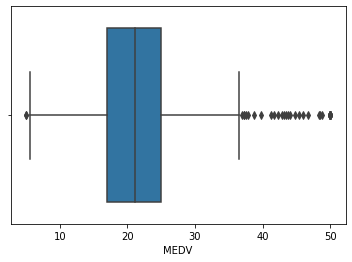

In [23]:
#이상치 처리
## 변수 박스 플롯 그리기
import seaborn as sns
sns.boxplot(data['MEDV'])
##20 부근에 값이 주로 산포해있음
## 이상치 존재하는 것으로 보임

In [25]:
## IQR 값 기준 이상치
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print("Outlier 범위 :  %.2f 초과 또는 %.2f 미만 " % (upper_bound, lower_bound))
print('Outlier 개수 : %.0f' % len(data[(data['MEDV'] > upper_bound) | (data['MEDV'] < lower_bound)]))

Outlier 범위 :  36.96 초과 또는 5.06 미만 
Outlier 개수 : 40


In [27]:
## IQR값 기준 이상치 함수화
def get_outlier_prop(x):
    Q1, Q3 = x.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = x[(x > upper_bound) | (x< lower_bound)]

    return str(round(100*len(outliers)/len(x), 1)) + '%'

data.apply(get_outlier_prop) # apply 함수 적용

CRIM           13.0%
ZN             13.4%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.2%
LSTAT           1.4%
MEDV            7.9%
isHighValue     0.0%
dtype: object

In [28]:
## 이상치 제거 예시 1
data1 = data[(data['MEDV'] <= upper_bound) & (data['MEDV'] >= lower_bound)]
data1.shape

(466, 15)

In [29]:
## 이상치 제거 예시 2
## MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV'] >= 45)]
data2.shape

(484, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

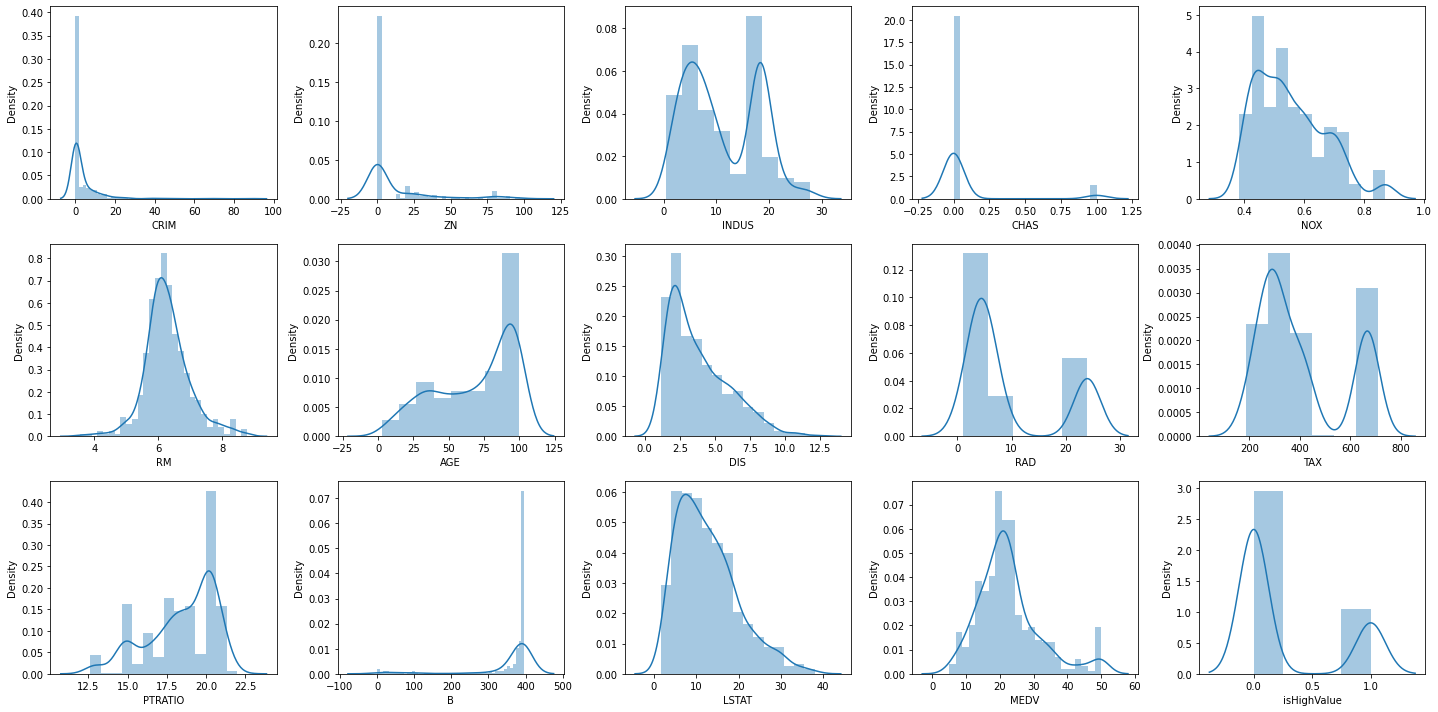

In [30]:
## 변수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots (ncols= 5, nrows = 3, figsize=(20,10))
idx = 0

for _row in range(3):
  for _col in range(5):
    if idx < len(cols):
      sns.distplot(data[cols[idx]], ax = axs[_row][_col])
      idx += 1

plt.tight_layout() # 자동 레이아웃 설정

In [31]:
## 변수 왜도 확인
data.apply(lambda x: x.skew(), axis = 0) ## skew : 왜도

CRIM           5.223149
ZN             2.225666
INDUS          0.295022
CHAS           3.405904
NOX            0.729308
RM             0.403612
AGE           -0.598963
DIS            1.011781
RAD            1.004815
TAX            0.669956
PTRATIO       -0.802325
B             -2.890374
LSTAT          0.906460
MEDV           1.108098
isHighValue    1.092403
dtype: float64

In [32]:
## CRIM 변수의 왜도가 5.223으로 3보다 크게 나옴 --> 로그 변환 시행

import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
data.CRIM.skew() ## 왜도값이 개선됨 --> 치우침 해소

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.2692005882725572

## 회귀 모델링